<a href="https://colab.research.google.com/github/spshreya/21daysofML/blob/main/LogisticReg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

In [67]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(14999, 10)

In [7]:
df['left'].unique()

array([1, 0])

In [9]:
df.info()  #no null values to be found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


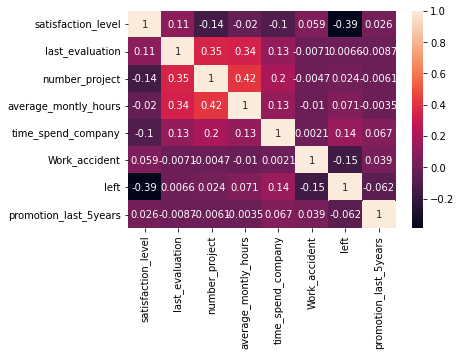

In [16]:
sns.heatmap(df.corr(), annot=True)

In [17]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [18]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

label encoding

In [19]:
from sklearn import preprocessing

In [68]:
le=preprocessing.LabelEncoder()
df['salary']= le.fit_transform(df['salary'])
df['Department']= le.fit_transform(df['Department'])
df['salary'].unique(),df['Department'].unique()

(array([1, 2, 0]), array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1]))

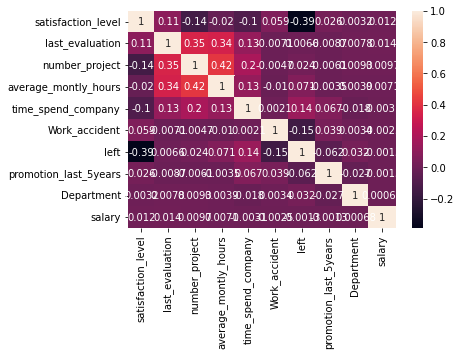

In [23]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
sns.pairplot(df)

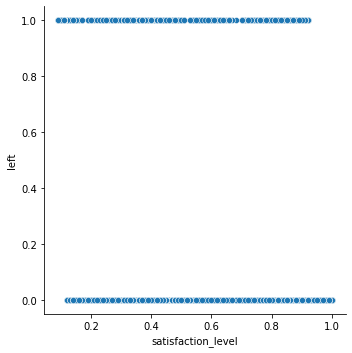

In [26]:
sns.relplot(x='satisfaction_level', y='left', data=df)

# LOGISTIC REGRESSION

In [43]:
x=np.array(df.iloc[:, np.r_[0,3,5,7]])
y=np.array(df.iloc[:, np.r_[6]])

In [42]:
x.shape

(14999, 4)

In [44]:
y.shape

(14999, 1)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [47]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [52]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
model.score(x_test,y_test)

0.7726666666666666

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Truth')

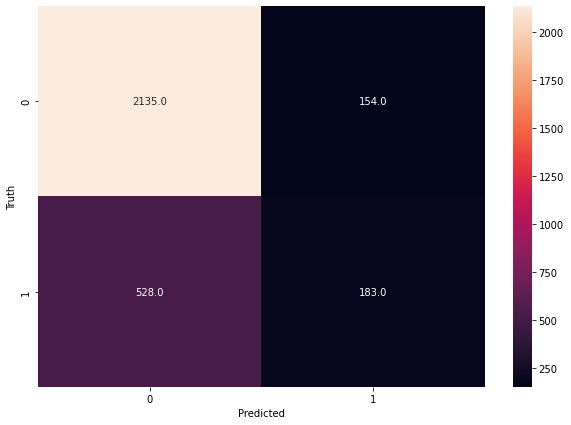

In [59]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

How prediction will change if we take all the cols as features

In [72]:
x=np.array(df.iloc[:, np.r_[0:6,7:10]])
x.shape

(14999, 9)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model.fit(x_train,y_train)

In [75]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
model.score(x_test,y_test)     #it is still similar, maybe because all the other columns were pretty useless

0.7573333333333333